In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_pairs_data
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [2]:
pairs_filename = "data/100/100_15_pairs.txt"

In [3]:
pairs = read_pairs_data(pairs_filename)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P1500,O,O,90
1,P1501,O,O,90
2,P1502,A,O,5
3,P1503,B,-,-1
4,P1504,O,O,90


In [4]:
grph = DirectedGraph(pairs)

In [5]:
a = time.time()
cycles = grph.get_cycles()
b = time.time() - a
print(b, "s")

0.010096073150634766 s


In [6]:
cycles

[['P1500', 'P1501'],
 ['P1500', 'P1501', 'P1502', 'P1514', 'P1520'],
 ['P1501', 'P1502', 'P1514', 'P1520'],
 ['P1502', 'P1514', 'P1520'],
 ['P1500', 'P1501', 'P1502', 'P1514', 'P1520', 'P1504'],
 ['P1501', 'P1502', 'P1514', 'P1520', 'P1504'],
 ['P1502', 'P1514', 'P1520', 'P1504'],
 ['P1514', 'P1520', 'P1504', 'P1505'],
 ['P1520', 'P1504', 'P1505'],
 ['P1505', 'P1525'],
 ['P1514', 'P1520', 'P1504', 'P1505', 'P1525', 'P1506'],
 ['P1520', 'P1504', 'P1505', 'P1525', 'P1506'],
 ['P1525', 'P1506'],
 ['P1505', 'P1525', 'P1506', 'P1526'],
 ['P1506', 'P1526'],
 ['P1514', 'P1520', 'P1504', 'P1505', 'P1525', 'P1506', 'P1526', 'P1508'],
 ['P1520', 'P1504', 'P1505', 'P1525', 'P1506', 'P1526', 'P1508'],
 ['P1525', 'P1506', 'P1526', 'P1508'],
 ['P1526', 'P1508'],
 ['P1500',
  'P1501',
  'P1502',
  'P1514',
  'P1520',
  'P1504',
  'P1505',
  'P1525',
  'P1506',
  'P1526',
  'P1508',
  'P1538'],
 ['P1501',
  'P1502',
  'P1514',
  'P1520',
  'P1504',
  'P1505',
  'P1525',
  'P1506',
  'P1526',
  'P1508'

In [7]:
edmond = EdmondsAlgorithm()

In [8]:
a = time.time()
edmond.finalize_exchange(grph)
b = time.time() - a
print(b, "s")

[(['P1560', 'P1576'], 12.5), (['P1560', 'P1576', 'P1565'], 16.0), (['P1576', 'P1565', 'P1566'], 16.0), (['P1576', 'P1565', 'P1567'], 16.0), (['P1576', 'P1565', 'P1571'], 16.0), (['P1547', 'P1528'], 19.0), (['P1505', 'P1525'], 19.5), (['P1525', 'P1506'], 19.5), (['P1505', 'P1525', 'P1506', 'P1526'], 19.5), (['P1506', 'P1526'], 19.5), (['P1525', 'P1506', 'P1526', 'P1508'], 19.5), (['P1526', 'P1508'], 19.5), (['P1540', 'P1512'], 19.5), (['P1512', 'P1543'], 19.5), (['P1540', 'P1512', 'P1543', 'P1517'], 19.5), (['P1543', 'P1517'], 19.5), (['P1539', 'P1540', 'P1512', 'P1543', 'P1517'], 20.2), (['P1546', 'P1547', 'P1528'], 20.333333333333332), (['P1539', 'P1540', 'P1512'], 20.666666666666668), (['P1545', 'P1546', 'P1547', 'P1528'], 21.0), (['P1545', 'P1546'], 23.0), (['P1576', 'P1565'], 23.0), (['P1505', 'P1525', 'P1506', 'P1526', 'P1508', 'P1538', 'P1507', 'P1539', 'P1540', 'P1512', 'P1543'], 26.90909090909091), (['P1525', 'P1506', 'P1526', 'P1508', 'P1538', 'P1507', 'P1539', 'P1540', 'P1512

In [9]:
edmond.show_donation_mapping('text')

P1560 --> P1576
P1547 --> P1528
P1505 --> P1525
P1506 --> P1526
P1540 --> P1512
P1543 --> P1517
P1545 --> P1546
P1527 --> P1574
P1585 --> P1587
P1565 --> P1582
P1557 --> P1559
P1514 --> P1520
P1538 --> P1507
P1544 --> P1509
P1556 --> P1510
P1500 --> P1501
P1515 --> P1519
P1529 --> P1531
P1558 --> P1568
P1570 --> P1578
P1580 --> P1584


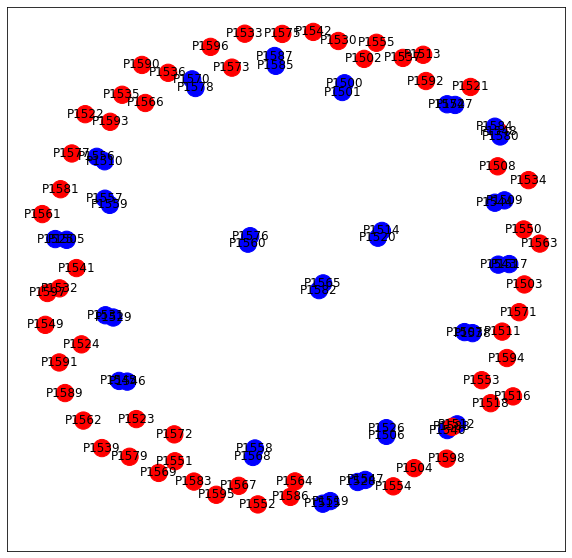

In [10]:
plt.figure(figsize=(10, 10))
edmond.show_donation_mapping('graph')

In [11]:
edmond.get_num_of_matched_pairs()

42